In [1]:
import numpy as np 
import pickle
%matplotlib inline 
import matplotlib 
from matplotlib import pyplot as plt

In [2]:
from kerasAC.vis import * 
def plot_seq_importance(vals_to_plot, xlim=None, ylim=None, figsize=(25, 3),title="",snp_pos=0,axes=None):
    """Plot  sequence importance score                                                                                                                                                                                                                                                                             
                                                                                                                                                                                                                                                                                                                   
    Args:                                                                                                                                                                                                                                                                                                          
      grads: either deeplift or gradientxinput score matrix                                                                                                                                                                                                                                                        
      x: one-hot encoded DNA sequence                                                                                                                                                                                                                                                                              
      xlim: restrict the plotted xrange                                                                                                                                                                                                                                                                            
      figsize: matplotlib figure size                                                                                                                                                                                                                                                                              
    """
    if axes is None:
        f,axes=plt.subplots(1,dpi=80,figsize=figsize)
        show=True
    else:
        show=False

    seq_len = vals_to_plot.shape[0]
    if xlim is None:
        xlim = (0, seq_len)
    if ylim is None:
        ylim= (np.amin(vals_to_plot),np.amax(vals_to_plot))
    axes=plot_bases_on_ax(vals_to_plot,axes,show_ticks=True)
    plt.xticks(list(range(xlim[0], xlim[1], 5)))
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_title(title)
    axes.axvline(x=snp_pos, color='k', linestyle='--')
    if show==True:
        plt.show()
    else:
        return axes


/users/annashch/kerasAC/kerasAC/vis/plot_letters.py:173: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/users/annashch/kerasAC/kerasAC/vis/plot_letters.py:174: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


## load TOBIAS 

In [3]:
## dnase, tobias, K562
tobias_data_dnase_k562=pickle.load(open("/srv/scratch/annashch/bias_correction/enzymatic_bias/tobias/dnase/K562.filtered_AtacBias.pickle",'rb'))
tobias_dnase_pssm_forward=np.transpose(tobias_data_dnase_k562.bias['forward'].pssm[0:4])[:,[0,2,3,1]]
tobias_dnase_pssm_reverse=np.transpose(tobias_data_dnase_k562.bias['reverse'].pssm[0:4])[:,[0,2,3,1]]
tobias_dnase_pssm_summed=tobias_dnase_pssm_forward+tobias_dnase_pssm_reverse 


In [4]:
## atac, tobias, GM12878
tobias_data_atac_gm12878=pickle.load(open("/srv/scratch/annashch/bias_correction/enzymatic_bias/tobias/atac/GM12878.merged.filtered_AtacBias.pickle",'rb'))
tobias_atac_pssm_forward=np.transpose(tobias_data_atac_gm12878.bias['forward'].pssm[0:4])[:,[0,2,3,1]]
tobias_atac_pssm_reverse=np.transpose(tobias_data_atac_gm12878.bias['reverse'].pssm[0:4])[:,[0,2,3,1]]
tobias_atac_pssm_summed=tobias_atac_pssm_forward+tobias_atac_pssm_reverse 


## load models


In [5]:
from keras.models import load_model
from keras.utils.generic_utils import get_custom_objects
from kerasAC.metrics import * 
from kerasAC.custom_losses import * 
custom_objects={"recall":recall,
                    "sensitivity":recall,
                    "specificity":specificity,
                    "fpr":fpr,
                    "fnr":fnr,
                    "precision":precision,
                    "f1":f1,
                    "ambig_binary_crossentropy":ambig_binary_crossentropy,
                    "ambig_mean_absolute_error":ambig_mean_absolute_error,
                    "ambig_mean_squared_error":ambig_mean_squared_error,
                    "MultichannelMultinomialNLL":MultichannelMultinomialNLL}
get_custom_objects().update(custom_objects)


Using TensorFlow backend.


In [6]:
dnase_kmer24_model=load_model("/srv/scratch/annashch/bias_correction/enzymatic_bias/profile_model_of_bias/24mer/dnase/bias.dnase.24mer.0.hdf5")
dnase_kmer24_weights=dnase_kmer24_model.layers[1].get_weights()[0].squeeze()

In [7]:
dnase_kmer6_model=load_model("/srv/scratch/annashch/bias_correction/enzymatic_bias/profile_model_of_bias/6mer/dnase/bias.dnase.6mer.0.hdf5")
dnase_kmer6_weights=dnase_kmer6_model.layers[1].get_weights()[0].squeeze()

In [18]:
atac_kmer24_model=load_model("/srv/scratch/annashch/bias_correction/enzymatic_bias/profile_model_of_bias/24mer/atac/bias.atac.24mer.0.hdf5")
atac_kmer24_weights=atac_kmer24_model.layers[1].get_weights()[0].squeeze()

In [19]:
atac_kmer6_model=load_model("/srv/scratch/annashch/bias_correction/enzymatic_bias/profile_model_of_bias/6mer/atac/bias.atac.6mer.0.hdf5")
atac_kmer6_weights=atac_kmer6_model.layers[1].get_weights()[0].squeeze()

In [33]:
dnase_kmer24_weights.shape

(24, 4, 5)

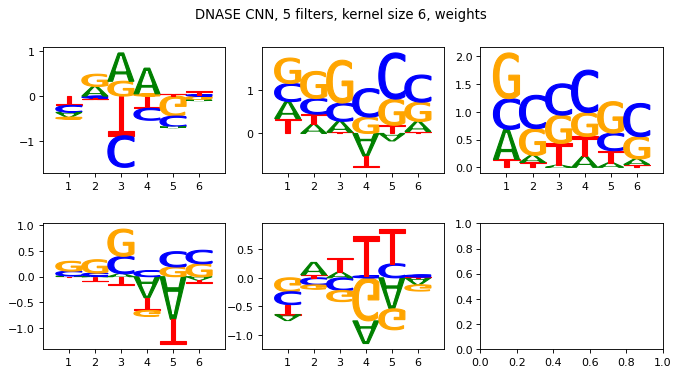

In [35]:
f,axes=plt.subplots(nrows=2,ncols=3,dpi=80,figsize=(10,5))
axes[0,0]=plot_bases_on_ax(dnase_kmer6_weights[:,:,0],axes[0,0],show_ticks=True)
axes[0,1]=plot_bases_on_ax(dnase_kmer6_weights[:,:,1],axes[0,1],show_ticks=True)
axes[0,2]=plot_bases_on_ax(dnase_kmer6_weights[:,:,2],axes[0,2],show_ticks=True)
axes[1,0]=plot_bases_on_ax(dnase_kmer6_weights[:,:,3],axes[1,0],show_ticks=True)
axes[1,1]=plot_bases_on_ax(dnase_kmer6_weights[:,:,4],axes[1,1],show_ticks=True)
plt.suptitle("DNASE CNN, 5 filters, kernel size 6, weights ")
plt.subplots_adjust(hspace=0.4)

In [43]:
dnase_kmer24_weights[:,:,0].shape

(24, 4)

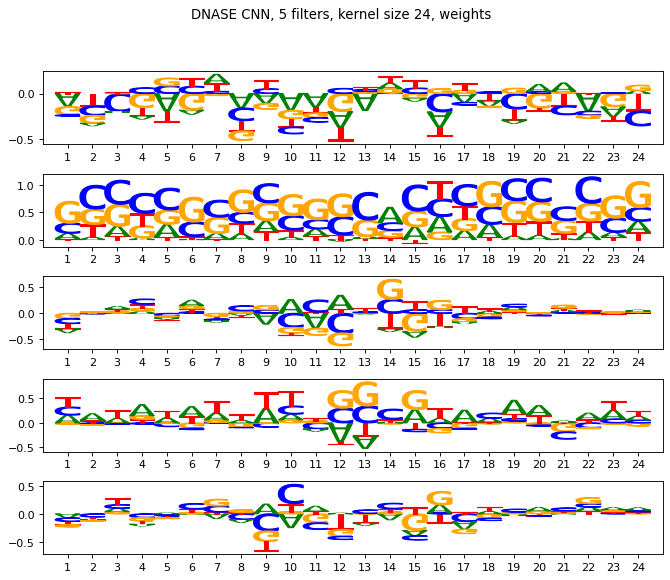

In [46]:
f,axes=plt.subplots(nrows=5,ncols=1,dpi=80,figsize=(10,8))
axes[0]=plot_bases_on_ax(dnase_kmer24_weights[:,:,0],axes[0],show_ticks=True)
axes[1]=plot_bases_on_ax(dnase_kmer24_weights[:,:,1],axes[1],show_ticks=True)
axes[2]=plot_bases_on_ax(dnase_kmer24_weights[:,:,2],axes[2],show_ticks=True)
axes[3]=plot_bases_on_ax(dnase_kmer24_weights[:,:,3],axes[3],show_ticks=True)
axes[4]=plot_bases_on_ax(dnase_kmer24_weights[:,:,4],axes[4],show_ticks=True)
plt.suptitle("DNASE CNN, 5 filters, kernel size 24, weights ")
plt.subplots_adjust(hspace=0.4)

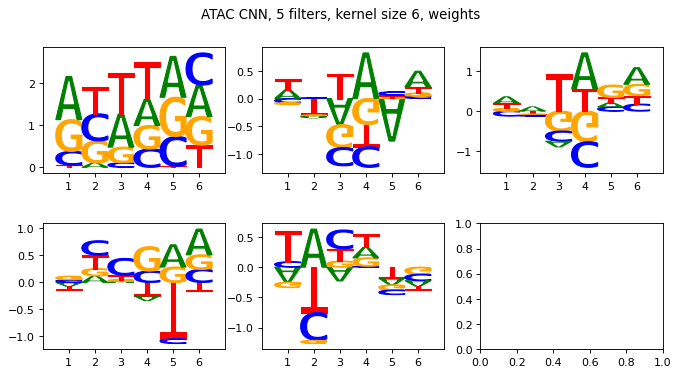

In [47]:
f,axes=plt.subplots(nrows=2,ncols=3,dpi=80,figsize=(10,5))
axes[0,0]=plot_bases_on_ax(atac_kmer6_weights[:,:,0],axes[0,0],show_ticks=True)
axes[0,1]=plot_bases_on_ax(atac_kmer6_weights[:,:,1],axes[0,1],show_ticks=True)
axes[0,2]=plot_bases_on_ax(atac_kmer6_weights[:,:,2],axes[0,2],show_ticks=True)
axes[1,0]=plot_bases_on_ax(atac_kmer6_weights[:,:,3],axes[1,0],show_ticks=True)
axes[1,1]=plot_bases_on_ax(atac_kmer6_weights[:,:,4],axes[1,1],show_ticks=True)
plt.suptitle("ATAC CNN, 5 filters, kernel size 6, weights ")
plt.subplots_adjust(hspace=0.4)

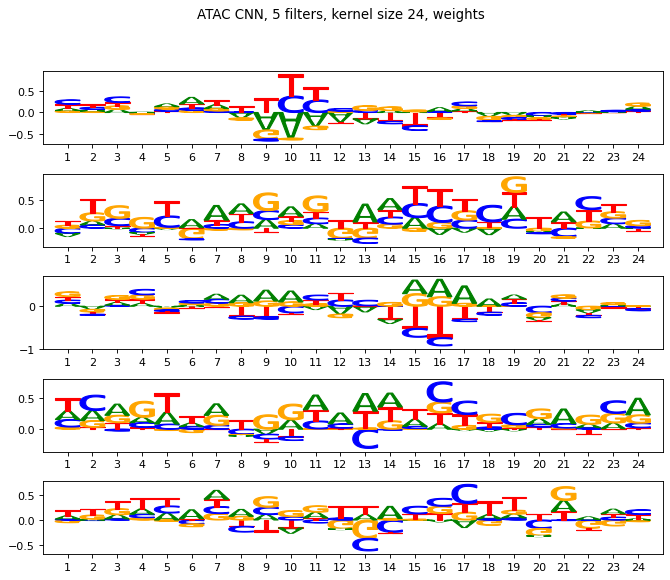

In [48]:
f,axes=plt.subplots(nrows=5,ncols=1,dpi=80,figsize=(10,8))
axes[0]=plot_bases_on_ax(atac_kmer24_weights[:,:,0],axes[0],show_ticks=True)
axes[1]=plot_bases_on_ax(atac_kmer24_weights[:,:,1],axes[1],show_ticks=True)
axes[2]=plot_bases_on_ax(atac_kmer24_weights[:,:,2],axes[2],show_ticks=True)
axes[3]=plot_bases_on_ax(atac_kmer24_weights[:,:,3],axes[3],show_ticks=True)
axes[4]=plot_bases_on_ax(atac_kmer24_weights[:,:,4],axes[4],show_ticks=True)
plt.suptitle("ATAC CNN, 5 filters, kernel size 24, weights ")
plt.subplots_adjust(hspace=0.4)

## Load KMER PSSM 

In [11]:
ohler_dnase_doublehit=np.loadtxt('/srv/scratch/annashch/bias_correction/enzymatic_bias_kmer/pwm.SeqBias_DNase_doublehit.txt').T
ohler_dnase_singlehit=np.loadtxt('/srv/scratch/annashch/bias_correction/enzymatic_bias_kmer/pwm.SeqBias_DNase_singlehit.txt').T
ohler_atac=np.loadtxt('/srv/scratch/annashch/bias_correction/enzymatic_bias_kmer/pwm.SeqBias_ATAC.txt').T
vierstra_dnase=np.loadtxt('/srv/scratch/annashch/bias_correction/enzymatic_bias_kmer/pwm.vierstra_et_al.6mer-model.txt').T


## plot 

In [12]:
f,axes=plt.subplots(6,dpi=80,figsize=(6,13))
seq_length=tobias_dnase_pssm_forward.shape[0]
axes[0]=plot_bases_on_ax(ohler_dnase_doublehit,axes[0],show_ticks=True)
axes[0].set_title('Ohler DNASE doublehit')
axes[2]=plot_bases_on_ax(ohler_dnase_singlehit,axes[2],show_ticks=True)
axes[2].set_title('Ohler DNASE singlehit')
axes[1]=plot_bases_on_ax(vierstra_dnase,axes[1],show_ticks=True)
axes[1].set_title('Vierstra DNASE')
axes[3]=plot_bases_on_ax(ohler_atac,axes[3],show_ticks=True)
axes[3].set_title('Ohler ATAC')
axes[4]=plot_bases_on_ax(dnase_kmer6_weights,axes[4],show_ticks=True)
axes[4].set_title('DNASE CNN, 1 filter, kernel size 6, weights')
axes[5]=plot_bases_on_ax(atac_kmer6_weights,axes[5],show_ticks=True)
axes[5].set_title('ATAC CNN, 1 filter, kernel size 6, weights')

plt.subplots_adjust(hspace=0.4)

AssertionError: (6, 4, 5)

In [ ]:
f,axes=plt.subplots(4,dpi=80,figsize=(16,10))
seq_length=tobias_dnase_pssm_forward.shape[0]
axes[0]=plot_bases_on_ax(tobias_dnase_pssm_forward,axes[0],show_ticks=True)
axes[0].set_title('TOBIAS DNASE PSSM Forward')
axes[1]=plot_bases_on_ax(tobias_dnase_pssm_reverse,axes[1],show_ticks=True)
axes[1].set_title('TOBIAS DNASE PSSM Reverse')
axes[2]=plot_bases_on_ax(tobias_dnase_pssm_summed,axes[2],show_ticks=True)
axes[2].set_title('TOBIAS DNASE PSSM Summed')
axes[3]=plot_bases_on_ax(dnase_kmer24_weights,axes[3],show_ticks=True)
axes[3].set_title('DNASE CNN, 1 filter, kernel size 24, weights')
plt.subplots_adjust(hspace=0.4)

In [ ]:
f,axes=plt.subplots(4,dpi=80,figsize=(16,10))
seq_length=tobias_atac_pssm_forward.shape[0]
axes[0]=plot_bases_on_ax(tobias_atac_pssm_forward,axes[0],show_ticks=True)
axes[0].set_title('TOBIAS ATAC PSSM Forward')
axes[1]=plot_bases_on_ax(tobias_atac_pssm_reverse,axes[1],show_ticks=True)
axes[1].set_title('TOBIAS ATAC PSSM Reverse')
axes[2]=plot_bases_on_ax(tobias_atac_pssm_summed,axes[2],show_ticks=True)
axes[2].set_title('TOBIAS ATAC PSSM Summed')
axes[3]=plot_bases_on_ax(atac_kmer24_weights,axes[3],show_ticks=True)
axes[3].set_title('ATAC CNN, 1 filter, kernel size 24, weights')
plt.subplots_adjust(hspace=0.4)

## BPNET kmer scores

In [19]:
dnase_6mer_bpnet=np.loadtxt("/srv/scratch/annashch/bias_correction/enzymatic_bias/qc_prof_mod_predictions/tmp.txt")

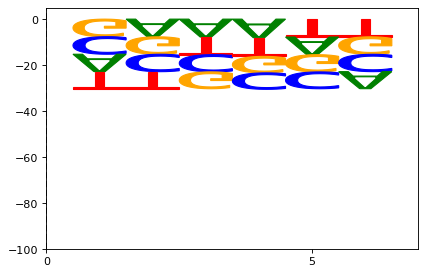

In [24]:
plot_seq_importance(dnase_6mer_bpnet.T,xlim=(0,7),ylim=(-100,5),figsize=(6,4))